In [2]:
!pip install import-ipynb

In [45]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import re 
import import_ipynb
import seaborn as sns

In [33]:
dados = pd.read_csv('titles.csv')
# lê a base de dados


In [5]:

# Primeiro filtramos nossa base para avaliar somente os filmes:
filmes = dados.loc[dados.type=='MOVIE']
filmes.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800


In [34]:
#depois fizemos o describe da popularidade e seguindo das outras variáveis também
filmes['tmdb_popularity'].describe()
# A target escolhida para avaliar quais filmes apresentam maior satisfação dos usuários foi a popularidade
# de acordo com o tmdb.
# Esta varia de 0.009442 a 2274.044000, pode-se observar que 50% da popularidade dos filmes na Netflix está abaixo de 5,
# mas a média é 20, 
# logo a popularidade de alguns filmes difere muito da maioria e dificulta a análise dos dados, dispersando muito o eixo
# Para as variáveis quantitativas com valores que fogem muito da média pode ser feito a elimição dos valores
# extremos a partir dos cálculos de limite superior e inferior
# que são LS: Q3 + 1,5 IQ e LI: Q1 - 1,5 IQ, sendo IQ= Q3 - Q1

count    3682.000000
mean       20.314546
std        78.066405
min         0.009442
25%         2.509250
50%         5.862000
75%        14.657250
max      2274.044000
Name: tmdb_popularity, dtype: float64

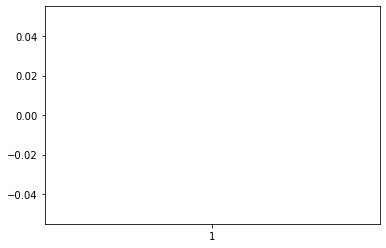

In [36]:

plt.boxplot(filmes['tmdb_popularity'])
plt.show()
# de tanto que os dados são dispersos, o gráfico boxplot nem aparece

In [7]:
# Retiramos os valores berrantes
Qter= filmes['tmdb_popularity'].quantile(0.75)
Qpri= filmes['tmdb_popularity'].quantile(0.25)
iq= Qter - Qpri
LS = Qter + 1.5*iq
LI= Qpri - 1.5*iq
filtro = filmes.loc[(filmes['tmdb_popularity']>LI)&(filmes['tmdb_popularity']<LS)]

filtro.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500


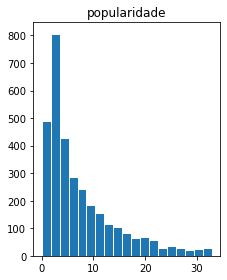

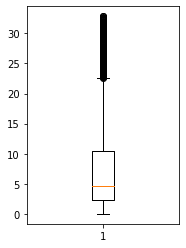

In [39]:
faixa_pop= np.linspace(filtro['tmdb_popularity'].min(), filtro['tmdb_popularity'].max(), 20)
plt.subplot(121) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 3
plt.hist(filtro['tmdb_popularity'], faixa_pop, edgecolor='white')
plt.title("popularidade")

plt.tight_layout()
plt.show()

plt.subplot(122)
plt.boxplot(filtro['tmdb_popularity'])
plt.show()

In [41]:
nota_imdb= filtro.imdb_score
nota_tmdb= filtro.tmdb_score
duracao= filtro.runtime
votos_imdb= filtro.imdb_votes
lancamento= filtro.release_year
popularidade= filtro.tmdb_popularity
# nomeando as outras variáveis e pegando apenas os valores dentro do filtro de valores berrantes de popularidade

In [107]:
# para analidar a frequêncidas dos dados, fizemos um histograma de cada uma das variáveis quantitativas
def hist(var): 
    faixa_var = np.linspace(var.min(), var.max(), 20)
    plt.hist(var,faixa_var , edgecolor='white', density=True)
    plt.title(var.name)

    return(plt.show())
faixa_votos= np.linspace(votos_imdb.min(), votos_imdb.max(), 30)
faixa_nota_imdb= np.linspace(nota_imdb.min(), nota_imdb.max(), 20)
faixa_nota_tmdb= np.linspace(nota_imdb.min(), nota_imdb.max(), 20)


In [108]:
#observando as variáveis quantitativas que temos pra analisar, foi feito um describe de cada uma, para entender como ela se comporta
nota_imdb.describe()

count    2972.000000
mean        6.262450
std         1.116871
min         1.500000
25%         5.600000
50%         6.400000
75%         7.100000
max         9.100000
Name: imdb_score, dtype: float64

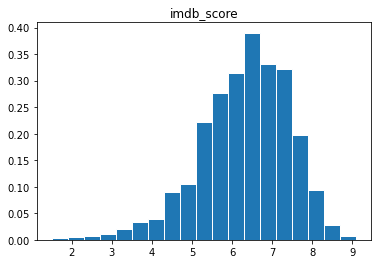

In [109]:
hist(nota_imdb)

In [110]:
nota_tmdb.describe()

count    3122.000000
mean        6.434910
std         1.065455
min         1.000000
25%         5.800000
50%         6.500000
75%         7.100000
max        10.000000
Name: tmdb_score, dtype: float64

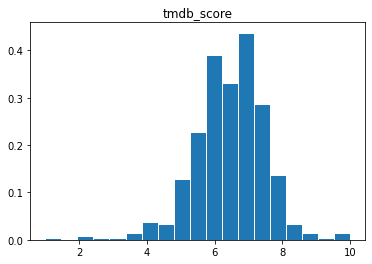

In [111]:
hist(nota_tmdb)

In [112]:
duracao.describe()

count    3254.000000
mean       97.758758
std        31.345156
min         2.000000
25%        84.000000
50%        98.000000
75%       115.000000
max       240.000000
Name: runtime, dtype: float64

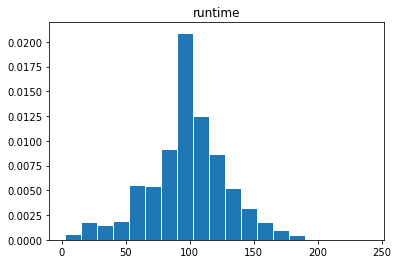

In [113]:
hist(duracao)

In [114]:
votos_imdb.describe() 
# o desvio padrão dos valores dos votos é muito alto,
# logo é importante retirar os valores absurdos para analisar seu histograma

count      2959.000000
mean      15442.719500
std       47325.908436
min           5.000000
25%         500.500000
50%        2199.000000
75%        8318.000000
max      841435.000000
Name: imdb_votes, dtype: float64

In [115]:
Qter_= votos_imdb.quantile(0.75)
Qpri_= votos_imdb.quantile(0.25)
iq_= Qter_ - Qpri_
LS_ = Qter_ + 1.5*iq_
LI_ = Qpri_ - 1.5*iq_
filtro_votos = filtro.loc[(votos_imdb>LI_)&(votos_imdb<LS_)]
votos_filtrado= filtro_votos.imdb_votes

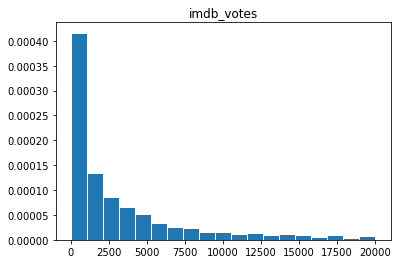

In [116]:
hist(votos_filtrado)

In [117]:
lancamento.describe()

count    3254.000000
mean     2015.676706
std         7.740367
min      1954.000000
25%      2015.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: release_year, dtype: float64

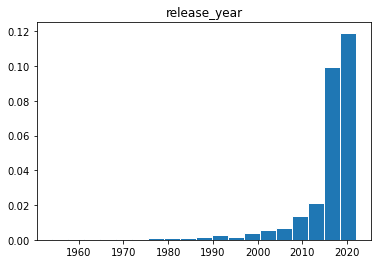

In [118]:
hist(lancamento)

<AxesSubplot:>

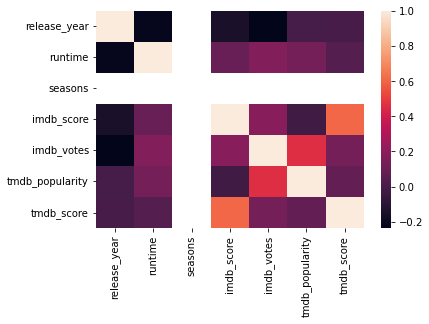

In [52]:
#Em seguida fizemos a correlação da popularidade com essas variáveis
# A correlação é um cálculo estatístico que torna possível a comparação de dois grupos de dados e,
# dessa forma, entender como eles se relacionam entre si
# Percebendo alguma covariância alta entre as variáveis é possível entender melhor o que influencia cada coisa
correlacao= filtro.corr()
sns.heatmap(correlacao)


Correlação entre tmdb_popularity e imdb_score é -0.04
Correlação entre tmdb_popularity e tmdb_score é 0.08
Correlação entre tmdb_popularity e runtime é 0.14
Correlação entre tmdb_popularity e release_year é -0.01
Correlação entre tmdb_popularity e imdb_votes é 0.46


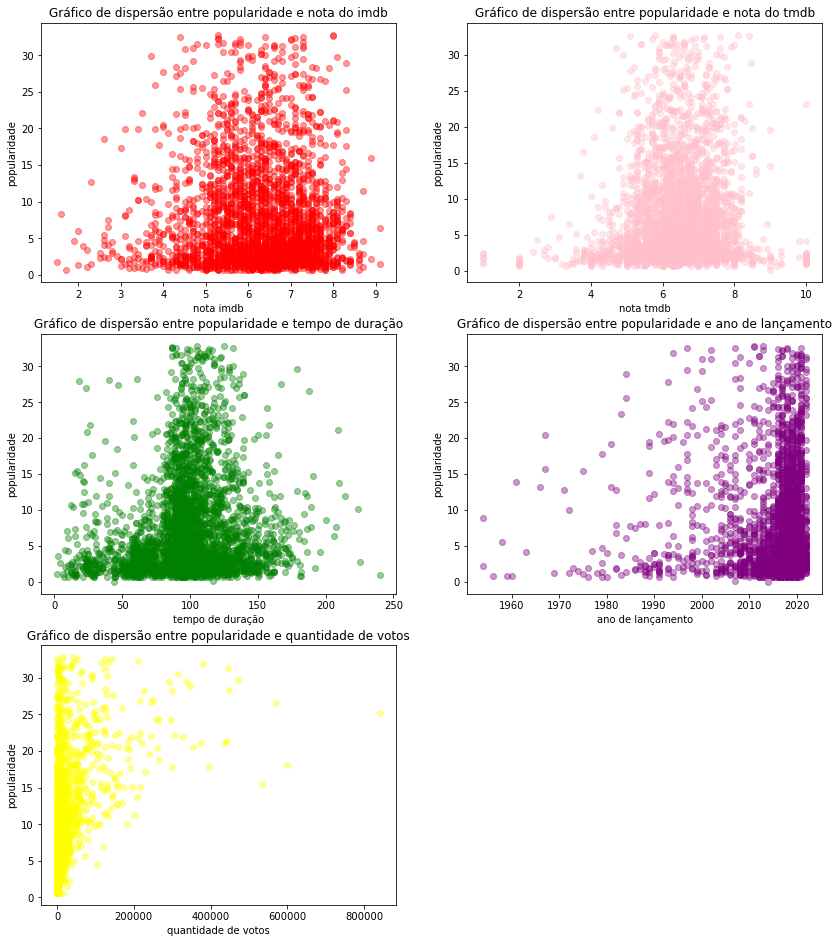

In [20]:
#Em seguida relacionamos a popularidade com cada variável quantitativa do dataframe para ver se havia alguma relação:
fig = plt.figure(figsize=(14, 14))
plt.subplot(321)
plt.scatter(nota_imdb, popularidade, color='red', alpha=0.4)
plt.title('Gráfico de dispersão entre popularidade e nota do imdb')
plt.xlabel('nota imdb')
plt.ylabel('popularidade')
plt.subplots_adjust(top=1)
print('Correlação entre tmdb_popularity e imdb_score é {0:.2f}'.format(filmes.tmdb_popularity.corr(filmes.imdb_score)))

plt.subplot(322)
plt.scatter(nota_tmdb, popularidade, color='pink', alpha=0.4)
plt.title('Gráfico de dispersão entre popularidade e nota do tmdb')
plt.xlabel('nota tmdb')
plt.ylabel('popularidade')
plt.subplots_adjust(top=1)
print('Correlação entre tmdb_popularity e tmdb_score é {0:.2f}'.format(popularidade.corr(nota_tmdb)))

plt.subplot(323)
plt.scatter(duracao, popularidade, color='green', alpha=0.4)
plt.title('Gráfico de dispersão entre popularidade e tempo de duração')
plt.xlabel('tempo de duração')
plt.ylabel('popularidade')
plt.subplots_adjust(top=1)
print('Correlação entre tmdb_popularity e runtime é {0:.2f}'.format(popularidade.corr(duracao)))

plt.subplot(324)
plt.scatter(lancamento, popularidade, color='purple', alpha=0.4)
plt.title('Gráfico de dispersão entre popularidade e ano de lançamento')
plt.xlabel('ano de lançamento')
plt.ylabel('popularidade')
plt.subplots_adjust(top=1)
print('Correlação entre tmdb_popularity e release_year é {0:.2f}'.format(popularidade.corr(lancamento)))

plt.subplot(325)
plt.scatter(votos_imdb, popularidade, color='yellow', alpha=0.4)
plt.title('Gráfico de dispersão entre popularidade e quantidade de votos')
plt.xlabel('quantidade de votos')
plt.ylabel('popularidade')
plt.subplots_adjust(top=1)
print('Correlação entre tmdb_popularity e imdb_votes é {0:.2f}'.format(popularidade.corr(votos_imdb)))



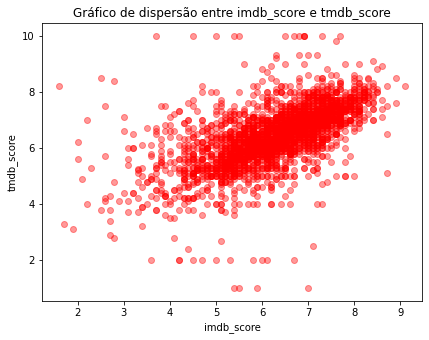

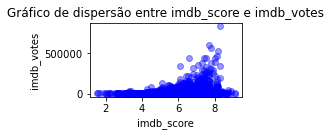

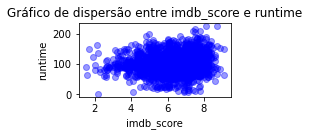

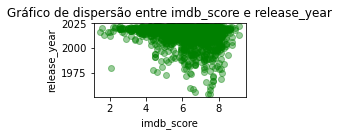

In [85]:
#relacionnamos as variaveis entre si

def scatter (v1, v2):
    colors = ['red', 'pink', 'green', 'purple', 'yellow', 'blue']
    varss = {'var1': v1.name, 'var2': v2.name , 'corr': v2.corr(v1)}
    plt.scatter(v1, v2, color=random.choice(colors), alpha=0.4)
    plt.title('Gráfico de dispersão entre {var1} e {var2}'.format(**varss))
    plt.xlabel(v1.name)
    plt.ylabel('{var2}'.format(**varss))
    plt.subplots_adjust(top=1)
    
    #0:.2f
    return(plt.show())

fig = plt.figure(figsize=(15, 15))

plt.subplot(321)
scatter(nota_imdb, nota_tmdb)

plt.subplot(322)
scatter(nota_imdb, votos_imdb)

plt.subplot(323)
scatter(nota_imdb, duracao)

plt.subplot(324)
scatter(nota_imdb, lancamento)

plt.show()

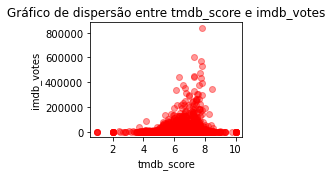

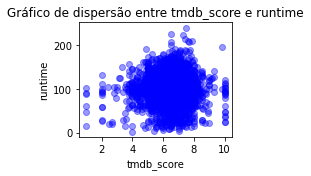

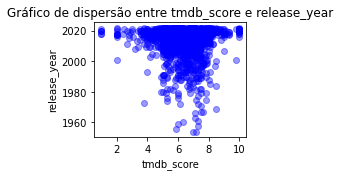

In [77]:
fig = fig

plt.subplot(221)
scatter(nota_tmdb, votos_imdb)

plt.subplot(222)
scatter(nota_tmdb, duracao)

plt.subplot(223)
scatter(nota_tmdb, lancamento)

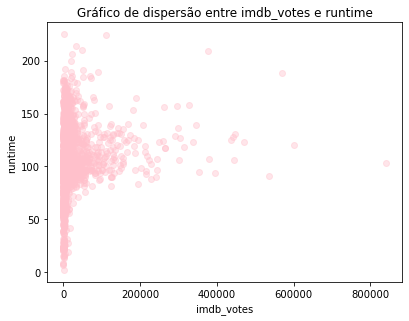

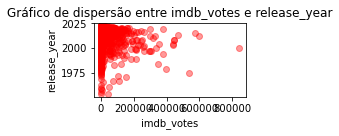

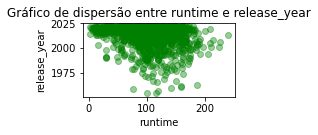

In [82]:
fig = plt.figure(figsize=(14, 14))

plt.subplot(321)
scatter(votos_imdb, duracao)

plt.subplot(322)
scatter(votos_imdb, lancamento)

plt.subplot(323)
scatter(duracao, lancamento)

plt.show()